# 8. Interactivity in Python

### Announcements
- Lab 7 due Wednesday 
- Interview with Shany Danieli on Friday
-  Code Review I for final projects due on November 19 (50% complete, working examples)

So far this semester, our interaction with Python has been primarily based in what I'll call "CLI", or command-line interface. If we want to, say, change a calculation, or what's being plotted, we have to change some lines of code and re-run our code (or `jupyter` cell). 

In many of your final projects, you'll be attempting to craft some form of ***interactive*** elements. This may look like input boxes, sliders, and buttons in a *Graphical User Interface* (GUI) run on a local computer, or similar inputs run on a website (also known as a *webapp*).

Getting to a point where we have a functional web app is a multi-step process, and we'll have to learn a few things over the next week or two before we get there. But we can start learning some more simple interactive elements now. 

Generally, when we move to creating "interactive apps", we no longer want to be working in a Jupyter notebook. For this in class demo, please use an editor of your choice (juypter has one, or atom, sublime, vscode, etc., are all options). 

## Building an interactive Webapp with Streamlit 

We're going to go step by step today and build a functioning webapp (that runs locally) using a new tool called `streamlit`. I'm a fan of this package because it's explicit goal is making the jump from working with the data in python, to displaying it and making it interactive online, as simple as possible --- certainly simpler than other frameworks I've worked with. 

To start, you'll need to install it. You'll also need the package `spectral_cube`, as the data we're going to display in our app uses this. 

Go ahead and `pip install streamlit` and `pip install spectral_cube` in your `a330` environments. 

## Understanding the Data

Before we can display and interact with our data, we need to understand what it is. The file you need for this "lab" is in the *Data Access* folder on our website/dropbox. It's a `FITS` file of radio data. As some of you may know, radio data captures both spatial information (like an image) and spectral information (the spectrum in each pixel).

A convenient way to store this information is in a "cube," where each slice is a flux map at a given wavelength (in radio, people use velocity as this axis, which is interchangeable).

See below how to read in the data:

In [30]:
from spectral_cube import SpectralCube
import astropy.units as u 

cube = SpectralCube.read('ngc1333_12co.fits')
cube = cube.with_spectral_unit(u.km / u.s)  

Let's have a look at this cube object:

In [32]:
cube

SpectralCube with shape=(301, 96, 81):
 n_x:     81  type_x: RA---SFL  unit_x: deg    range:    51.926288 deg:   52.578630 deg
 n_y:     96  type_y: DEC--SFL  unit_y: deg    range:    30.950806 deg:   31.610524 deg
 n_s:    301  type_s: VELO      unit_s: km / s  range:       -9.995 km / s:      29.995 km / s

In [31]:
cube.spectral_axis

<Quantity [-9.99541283e+00, -9.86211205e+00, -9.72881126e+00,
           -9.59551048e+00, -9.46220970e+00, -9.32890892e+00,
           -9.19560814e+00, -9.06230736e+00, -8.92900658e+00,
           -8.79570580e+00, -8.66240501e+00, -8.52910423e+00,
           -8.39580345e+00, -8.26250267e+00, -8.12920189e+00,
           -7.99590111e+00, -7.86260033e+00, -7.72929955e+00,
           -7.59599876e+00, -7.46269798e+00, -7.32939720e+00,
           -7.19609642e+00, -7.06279564e+00, -6.92949486e+00,
           -6.79619408e+00, -6.66289330e+00, -6.52959251e+00,
           -6.39629173e+00, -6.26299095e+00, -6.12969017e+00,
           -5.99638939e+00, -5.86308861e+00, -5.72978783e+00,
           -5.59648705e+00, -5.46318626e+00, -5.32988548e+00,
           -5.19658470e+00, -5.06328392e+00, -4.92998314e+00,
           -4.79668236e+00, -4.66338158e+00, -4.53008080e+00,
           -4.39678001e+00, -4.26347923e+00, -4.13017845e+00,
           -3.99687767e+00, -3.86357689e+00, -3.73027611e+00,
        

We can pull a slice at any channel number (i.e., any velocity) via the following:

In [33]:
%matplotlib inline

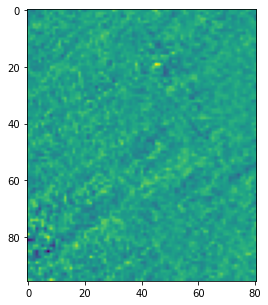

In [35]:
im = cube.unmasked_data[0]
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(im)

Each of those images represents a slice of the emission of 12 CO at a single velocity.

*Exercise: Write a **function** `load_data()` which loads this fits file as shown above, sets the spectral units, and returns it*. 

## Why Interactivity?

We can plot any individual frame (velocity slice) of our cube as shown above, re-running our code/cell for different channel numbers. But it is often valuable to "page through" this data, to quickly jump around, advance frames, etc. Additionally, what if we want to dynamically average or sum over some subset of slices? We can do that with interactivity. That brings us to Streamlit, and the concept of a webapp.

As intimated by Yao on Friday, Python Webapps involve two components: a `server`, where the "backend" of the code is running, and a "frontend", which comprises the html/css/js/nodejs that defines how users interact with the program within a browser. 

There exists things called `Frameworks` (examples include Flask, Django, Emmett, and FastAPI). These frameworks have things under the hood that let you connect together the frontend stuff (webpages, urls, etc), with the backend (a python server they're running). 

These can be involved to learn, but provide the ultimate amount of control over the way a website looks/feels/operates. `Streamlit` is a little different. It does run a server, but rather than provide a full framework, it's a true library of Python classes/methods that allow you to simply get things up and going, while sacrificing some creative control. For now, we'll host these servers "locally" (like a notebook), but the ultimate goal is usually to host it "online" somewhere where others can then use it.

We're going to use a few of the many elements available in streamlit for this demo:
- sliders 
- range-sliders
- buttons
- image display
- headers/text display

## The Basics

Streamlit has a lot of specialized commands, but an easy one to use (most of the time) is `st.write()`. This is designed to be a magic command that works like `print()`, but will nicely format whatever you put in (dataframe, number, text string) and then display it on your little webpage. 

If you made a file with multiple `st.write()` calls, they would appear in order on the page (as in the file). 

Similarly, if we want to, say, display a `matplotlib` figure, we use `st.pyplot(fig)`, feeding in some created figure. 

The most important concept to remember when working with `streamlit` is that any time a change is made (user slides a slider, hits a button, hits submit on a form, etc.), *the entire script is re-executed*. 

This means that by default, you don't have a `memory` or global namespace where variables are sticking around. Luckily, `streamlit` has an answer: `st.session_state`. 

Whenever a browser connects to the app and runs, there's a special container called session state, where if we want, we can store input values and "remember" them across re-runs, modifying them as desired when the user inputs certain things. 

When we want to use a session state variable, we need to make sure that at the start of a re-run, the variable doesn't get overwritten if it exists, but does get created if it doesn't. For that, we use this format:

In [ ]:
if 'key' not in st.session_state:
    st.session_state['key'] = something

# Note, dot notation is also supported:
if 'key' not in st.session_state:
    st.session_state.key = something 

Later, in our code, we can access that variable via `st.session_state.key`, (or the dict-style). We can also change or overwrite it. As long as the browser session is going, this can keep going.

## Building the App

It's time to start building. There'll be some more new things, but they make more sense in the context of the app. 

The first thing we need is imports. I'll provide the ones you need here:

In [ ]:
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
from spectral_cube import SpectralCube
import astropy.units as u 
import copy 

Next, we need to get our data in. You've already done this in the exercise above: simply add your function in, and use it to load the data. But... for a bit of extra fun, add the following decorator (I'm about to explain decorators):

In [ ]:
@st.cache(allow_output_mutation=True)
def load_data():
    # Your code here
    return something

cube = load_data()

As I said above, streamlit runs your script everytime any of the interactive elements is interacted with. But we don't want to load this fits file every time, because that's slow. So we take advantage of a built-in streamlit trick in which it will `cache` the array containing the raw data (i.e., the execution of this function). This is sort of like saving it to the session_state. The specifying syntax, decorators, are specifiied with the `@` sign. If you'd like, we can cover these in a special session, but they're not super important at this stage.

Ok, so we have our data in our run script. How do we plot it? Below where it is loaded, go ahead and make some `fig, ax` objects using `subplots`, and then use the syntax we saw above for `spectral_cube` to plot (using `imshow`) the 0th channel slice of the data. The only extra line you need to get it to show up is 

```
st.pyplot(fig)
```

after you've made your figure and run the imshow stuff.

In [ ]:
im = cube.unmasked_data[0]
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(im)

Lastly, go ahead and throw an `st.title('My Webapp')` (or whatever you want) at the top of your script, after the imports. We're now ready to see if our app works (in this simple state). 

Go to the directory with the python file you made, and type

```
streamlit run app.py 
```
where you put in the name of your file. It should open a webpage for you, or give you a webaddress to plug in. Did it work? Did you get an error?

For the interactive nature of the app, we're going to need to track and remember the velocity channel we're in. Add the following to the top of your file (after the title but before anything else):

In [ ]:
if 'channel' not in st.session_state:
    st.session_state['channel'] = 0

This will initialize the channel state variable and give it an initial value the *first* time the script is run during a session, but *won't* overwrite it any subsequent times during the same session.

Now for the fun bit. Add the following line somewhere below where you data is read in, but before your plotting lines:

In [ ]:
st.session_state.channel = st.slider('Choose Channel',min_value=0,max_value=len(cube),value=None,step=1)

And in your line where you currently query the datacube for the 0th slice, replace that 0 with 

In [ ]:
st.session_state.channel

Rerun your code on the server... and you should have a functional slider that changes the slice being shown!

For the rest of class, pick one additional feature shown in my demo to implement by reading the docs for streamlit -- either the widget (they call it `st.metric` for showing the actual velocity in km/s, or the buttons that advance the frames, or the range-slider (normal slider, different arguments) which shows the mean over that range. 

I recommend if you're going to do the buttons.... get rid of the slider. I can show how I got them to work together, but it took a bit of hacking. At the end, I'll show how mine works! (Mine's only ~45 lines of code).

In summary, this took us (relatively) little time and very little extra lines of code, but we can make interactive tools for ourselves easily this way. 

### Working Streamlit Example (with multiple widgets)

Below, (post-lecture), I've added the full script I used to make the "flashy" version of the demo; feel free to play around with it!

In [ ]:
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
from spectral_cube import SpectralCube
import astropy.units as u 
import copy 


st.title('FITS Cube Viewer')

st.header('Channel Viewer')
if 'channel' not in st.session_state:
    st.session_state['channel'] = 0

if 'oldchannel' not in st.session_state:
    st.session_state['oldchannel'] = 0 

if 'velocity' not in st.session_state:
    st.session_state['velocity'] = 0


@st.cache(allow_output_mutation=True)
def load_data():
    cube = SpectralCube.read('ngc1333_12co.fits')
    cube = cube.with_spectral_unit(u.km / u.s)  
    return cube   

data = load_data() 

if 'momrange' not in st.session_state:
    st.session_state['momrange'] = (0,len(data)) 

col1,col2,col3 = st.columns(3)
if col1.button('Previous Channel'):
    if st.session_state.channel-1<=0:
        st.write('Reached channel 0')
    else:    
        
        st.session_state.channel-=1
        st.session_state.oldchannel = copy.copy(st.session_state.channel)

        
if col3.button('Next Channel'):
    if st.session_state.channel + 1 >= len(data):
        st.write('Reached last channel!')
    else:
        
        st.session_state.channel+=1
        st.session_state.oldchannel = copy.copy(st.session_state.channel)


st.session_state.channel = st.slider('Choose Channel',min_value=0,max_value=len(data),value=st.session_state.oldchannel,step=1)

fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(data[st.session_state.channel].data) 
st.pyplot(fig)
st.session_state.velocity = float(data.spectral_axis[st.session_state.channel].value)
col2.metric('Velocity [km/s]', f'{st.session_state.velocity:.2f}', delta=None, delta_color="normal")

st.header('Moment Map Creator')

st.session_state.momrange = st.slider('Select a range of channels',130, 145, (0, len(data)))

fig2, ax2 = plt.subplots(figsize=(7,7))
img = np.mean(data.unmasked_data[st.session_state.momrange[0]:st.session_state.momrange[1]],axis=0)
ax2.imshow(img) 
st.pyplot(fig2)
